# Twitter Hate Speech Classification  

### Natural Language Processing  

***Help Twitter Combat Hate Speech Using NLP and Machine Learning***

* **Description:** Using NLP and ML to make a model to identify hate speech (racist or sexist tweets) in Twitter.


Twitter is the biggest platform where anybody and everybody can have their views heard. Some of these voices spread hate and negativity. Twitter is wary of its platform being used as a medium to spread hate.  

We will use NLP techniques, perform specific cleanup for tweets data, and make a robust model.  

Analysis to be done: Clean up tweets and build a classification model by using NLP techniques, cleanup specific for tweets data, regularization and hyperparameter tuning using stratified k-fold and cross validation to get the best model.  


Content:
***  

**id:** identifier number of the tweet  
**Label:** 0 (non-hate) /1 (hate)  
**Tweet:** the text in the tweet   
***  



Tasks:

Load the tweets file using read_csv function from Pandas package.

Get the tweets into a list for easy text cleanup and manipulation.

To cleanup:

* Normalize the casing.
* Using regular expressions, remove user handles. These begin with '@’.
* Using regular expressions, remove URLs.
* Using TweetTokenizer from NLTK, tokenize the tweets into individual terms.
* Remove stop words.
* Remove redundant terms like ‘amp’, ‘rt’, etc.
* Remove ‘#’ symbols from the tweet while retaining the term.
* Extra cleanup by removing terms with a length of 1.  

Check out the top terms in the tweets:

* First, get all the tokenized terms into one large list.
* Use the counter and find the 10 most common terms.  

Data formatting for predictive modeling:

* Join the tokens back to form strings. This will be required for the vectorizers.
* Assign x and y.
* Perform train_test_split using sklearn.  

We’ll use TF-IDF values for the terms as a feature to get into a vector space model.

* Import TF-IDF vectorizer from sklearn.
* Instantiate with a maximum of 5000 terms in your vocabulary.
* Fit and apply on the train set.
* Apply on the test set.  

Model building: Ordinary Logistic Regression

* Instantiate Logistic Regression from sklearn with default parameters.
* Fit into the train data.
* Make predictions for the train and the test set.

Model evaluation: Accuracy, recall, and f_1 score.

* Report the accuracy on the train set.
* Report the recall on the train set: decent, high, or low.
* Get the f1 score on the train set.

Looks like we need to adjust the class imbalance, as the model seems to focus on the 0s.

* Adjust the appropriate class in the LogisticRegression model.


Train again with the adjustment and evaluate.

* Train the model on the train set.
* Evaluate the predictions on the train set: accuracy, recall, and f_1 score.

Regularization and Hyperparameter tuning:

* Import GridSearch and StratifiedKFold because of class imbalance.
* Provide the parameter grid to choose for ‘C’ and ‘penalty’ parameters.
* Use a balanced class weight while instantiating the logistic regression.  

Find the parameters with the best recall in cross-validation.

* Choose ‘recall’ as the metric for scoring.
* Choose a stratified 4 fold cross-validation scheme.
* Fit into the train set.  

What are the best parameters?

Predict and evaluate using the best estimator.

* Use the best estimator from the grid search to make predictions on the test set.
* What is the recall on the test set for the toxic comments?
* What is the f_1 score?

### Import Libraries and Load Data


In [1]:
# General packages for data manipulation
import os
import numpy as np
import pandas as pd

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Consistent sized plot
from pylab import rcParams
rcParams['figure.figsize']=12,5
rcParams['axes.labelsize']=12
rcParams['xtick.labelsize']=12
rcParams['ytick.labelsize']=12


# Handle the warnings in the code
import warnings
warnings.filterwarnings(action='ignore',category=DeprecationWarning)
warnings.filterwarnings(action='ignore',category=FutureWarning)


# Text Preprocessing libraries
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.tokenize import WordPunctTokenizer
from nltk.tokenize import TweetTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

import re

# Display pnadas dataframe columns
pd.options.display.max_columns = None





In [2]:
#load the csv file as a pandas dataframe
#ISO-8859-1

tweet = pd.read_csv('/content/TwitterHate.csv', delimiter=',', engine='python', encoding='utf-8-sig')
tweet.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


* get rid of the identifier number of the tweet

In [3]:
tweet.drop('id', axis=1, inplace=True)

* View one of the tweets randomly

In [4]:
random = np.random.randint(0, len(tweet))
print(random)
tweet.iloc[random]['tweet']

9458


'#justinb   gorilla simulator: you need to do to adapt to the environment. the need to tear the city. materia '

* Create a copy of the original data to work with

In [5]:
df = tweet.copy()

### Text Cleaning  

* Handle Diacritics using text normalization

In [6]:
def simplify(text):
  '''Function to handle the diacritics in the text'''
  import unicodedata
  try:
    text = unicode(text, 'utf-8')
  except NameError:
    pass
  text = unicodedata.normalize('NFD', text).encode('ascii', 'ignore').decode("utf-8")

  return str(text)

In [7]:
df['tweet'] = df['tweet'].apply(simplify)

* Remove user handles

In [8]:
# Test on a sample string

sample = "and @user1 i would like you to discuss with @user2 and then with @username3"
pattern = re.compile(r'@\w+')
re.findall(pattern, sample)

['@user1', '@user2', '@username3']

In [9]:
# Remove all the user handles --> strings starting with @
df['tweet'].replace(r'@\w+', '', regex=True, inplace=True)

* Remove the Urls

In [10]:
# Test on a sample
sample = "https://www.machinelearing.com prakhar and https://www.simple.com"
pattern = re.compile(r'http\S+')
re.findall(pattern, sample)

['https://www.machinelearing.com', 'https://www.simple.com']

In [11]:
df['tweet'].replace(r'http\S+', '', regex=True, inplace=True)

* Tokenize using tweet tokenizer

In [12]:
# Test on a sample text
sample = 'wonderfl :-) when are you coming for #party'
tweet_tokenize = TweetTokenizer(preserve_case=True)
tweet_tokenize.tokenize(sample)

['wonderfl', ':-)', 'when', 'are', 'you', 'coming', 'for', '#party']

In [13]:
# Tokenize the tweets in the dataframe using TweetTokenizer
tokenizer = TweetTokenizer(preserve_case=True)
df['tweet'] = df['tweet'].apply(tokenizer.tokenize)

In [14]:
df.head(3)

,label,tweet
0,0,"[when, a, father, is, dysfunctional, and, is, ..."
1,0,"[thanks, for, #lyft, credit, i, can't, use, ca..."
2,0,"[bihday, your, majesty]"


### Remove Stopwords
Append more words to be removed from the text - example rt and amp which occur very frequently

In [15]:
import nltk
nltk.download('stopwords')
stop_words = stopwords.words('english')

# add additional step words to be removed from the text
additional_list = ['amp', 'rt', 'u', "can't", 'ur']

for words in additional_list:
  stop_words.append(words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [16]:
stop_words[-10:]

["weren't",
 'won',
 "won't",
 'wouldn',
 "wouldn't",
 'amp',
 'rt',
 'u',
 "can't",
 'ur']

In [17]:
# remove stop words
def remove_stopwords(text):
  '''Function to remove the stop words from the text corpus'''
  clean_text = [word for word in text if not word in stop_words]
  return clean_text


In [18]:
# remove the stop words from the tweets
df['tweet'] = df['tweet'].apply(remove_stopwords)

In [19]:
df['tweet'].head()

,tweet
0,"[father, dysfunctional, selfish, drags, kids, ..."
1,"[thanks, #lyft, credit, use, cause, offer, whe..."
2,"[bihday, majesty]"
3,"[#model, love, take, time, !, !, !]"
4,"[factsguide, :, society, #motivation]"


* Spelling corrections

In [20]:
# Apply spelling correction on a sample text
from textblob import TextBlob

sample = 'amazng man you did it finallyy'
txtblob = TextBlob(sample)
corrected_text = txtblob.correct()
print(corrected_text)

amazing man you did it finally


In [21]:
# textblob expect a string to be passed and not a list of strings
from textblob import TextBlob

def spell_check(text):
  '''Function to do spelling correction using '''
  txtblob = TextBlob(text)
  corrected_text = txtblob.correct()
  return corrected_text

* Remove # symbols while retaining the text

In [22]:
#try tremoving # symbols from a sample text
sample = '#winner #machine i am learning'
pattern = re.compile(r'#')
re.sub(pattern, '', sample)

'winner machine i am learning'

In [23]:
def remove_hashsymbols(text):
  '''Function to remove the hashtag symbol from the text'''
  pattern = re.compile(r'#')
  text = ' '.join(text)
  clean_text = re.sub(pattern, '', text)
  return tokenizer.tokenize(clean_text)

In [24]:
df['tweet'] = df['tweet'].apply(remove_hashsymbols)

In [25]:
df.head(3)

,label,tweet
0,0,"[father, dysfunctional, selfish, drags, kids, ..."
1,0,"[thanks, lyft, credit, use, cause, offer, whee..."
2,0,"[bihday, majesty]"


* Remove single and double length characters

In [26]:
def rem_shortwords(text):
  '''Function to remove the short words of length 1 and 2 characters'''
  '''Arguments:
    text: string
    returns: string without containing words of length 1 and 2'''
  lengths = [1, 2]
  new_text = ' '.join(text)
  for word in text:
    text = [word for word in tokenizer.tokenize(new_text) if not len(word) in lengths]
  return new_text


In [27]:
df['tweet'] = df['tweet'].apply(rem_shortwords)

In [28]:
df.head(2)

,label,tweet
0,0,father dysfunctional selfish drags kids dysfun...
1,0,thanks lyft credit use cause offer wheelchair ...


In [29]:
df['tweet'] = df['tweet'].apply(tokenizer.tokenize)

In [30]:
df.head(3)

,label,tweet
0,0,"[father, dysfunctional, selfish, drags, kids, ..."
1,0,"[thanks, lyft, credit, use, cause, offer, whee..."
2,0,"[bihday, majesty]"


* Remove digits

In [31]:
def rem_digits(text):
  '''Function to remove the digits from the list of strings'''
  no_digits = []
  for word in text:
    no_digits.append(re.sub(r'\d', '', word))
  return ' '.join(no_digits)

In [32]:
df['tweet'] = df['tweet'].apply(rem_digits)

df['tweet'] = df['tweet'].apply(tokenizer.tokenize)

In [33]:
df.head()

,label,tweet
0,0,"[father, dysfunctional, selfish, drags, kids, ..."
1,0,"[thanks, lyft, credit, use, cause, offer, whee..."
2,0,"[bihday, majesty]"
3,0,"[model, love, take, time, !, !, !]"
4,0,"[factsguide, :, society, motivation]"


* Remove special characters

In [34]:
def rem_nonalpha(text):
  '''Function to remove the non-alphanumeric characters from the text'''
  text = [word for word in text if word.isalpha()]
  return text

In [35]:
#remove the non alpha numeric characters from the tweet tokens
df['tweet'] = df['tweet'].apply(rem_nonalpha)

In [36]:
df.head()

,label,tweet
0,0,"[father, dysfunctional, selfish, drags, kids, ..."
1,0,"[thanks, lyft, credit, use, cause, offer, whee..."
2,0,"[bihday, majesty]"
3,0,"[model, love, take, time]"
4,0,"[factsguide, society, motivation]"


### Exploratory Data Analysis - Broad Approach

* Check for data balance

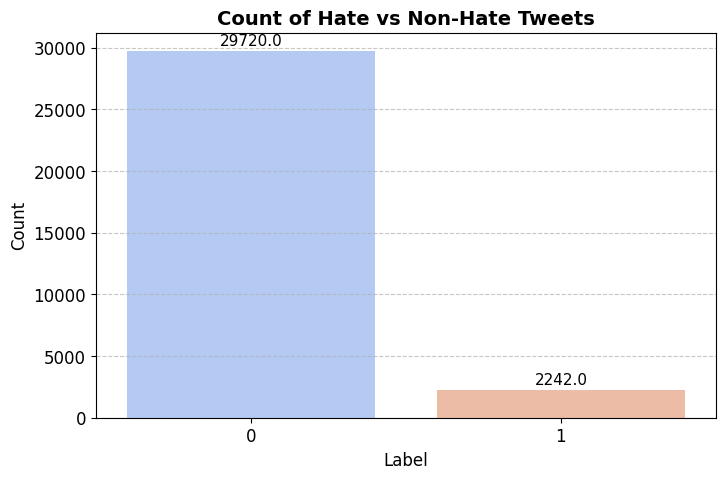

In [37]:
#plot of the count of hate and non hate tweet
#sns.countplot(df['label'])
#plt.title('Count of Hate vs Non Hate Tweet')
#plt.grid()
#plt.show()

# Plot the count of hate and non-hate tweets
plt.figure(figsize=(8, 5))  # Adjust the figure size
ax = sns.countplot(data=df, x='label', palette='coolwarm')  # Use a palette for better visualization
plt.title('Count of Hate vs Non-Hate Tweets', fontsize=14, weight='bold')
plt.xlabel('Label', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value annotations on the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=11, color='black', xytext=(0, 7),
                textcoords='offset points')

plt.show()

There are more non hatespeeches than the hatespeech in the dataset

* Check out the top terms in the tweets

In [38]:
from collections import Counter

results = Counter()
df['tweet'].apply(results.update)

# print the top 10 most common terms in the tweet
print(results.most_common(10))

[('love', 2762), ('day', 2319), ('happy', 1679), ('like', 1160), ('time', 1138), ('life', 1124), ('today', 1017), ('new', 994), ('thankful', 947), ('positive', 931)]


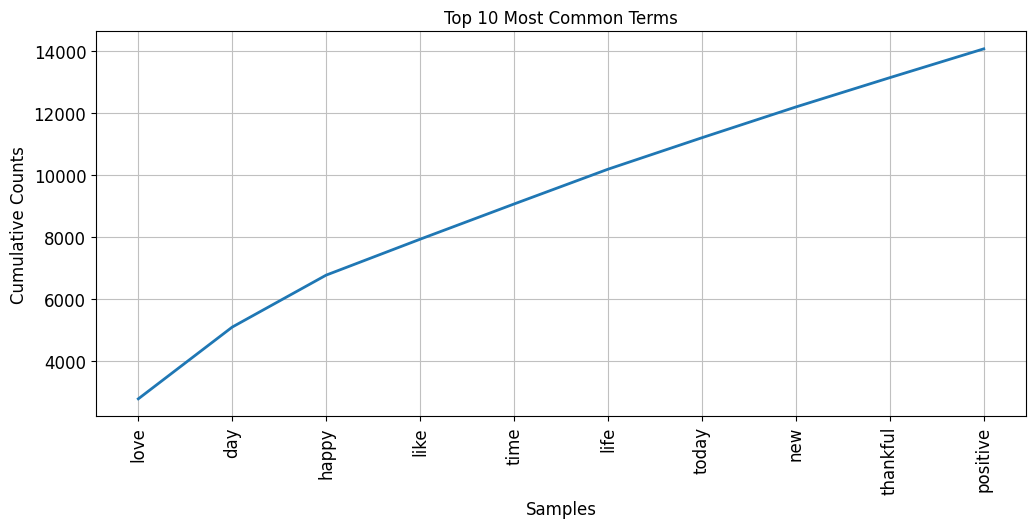

In [39]:
# Plot the cumulative frequency of the top 10 most common tokens

frequency = nltk.FreqDist(results)
plt.title('Top 10 Most Common Terms')
frequency.plot(10, cumulative=True)
plt.show()

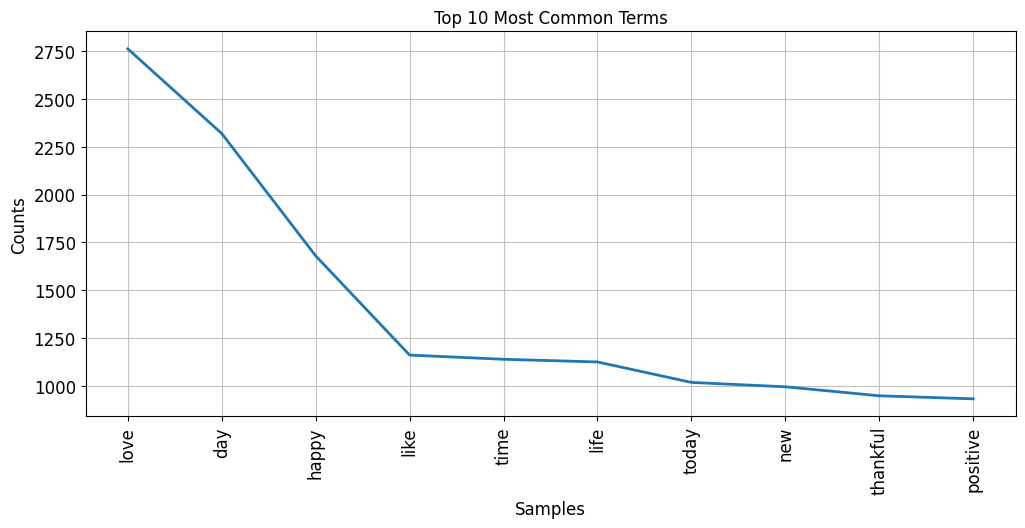

In [40]:
# Plot the frequency of the top 10 most common tokens
frequency = nltk.FreqDist(results)
plt.title('Top 10 Most Common Terms')
frequency.plot(10,cumulative=False)
plt.show()

Love is the most frequently used word followed by day, happy etc... This is expected as there are more non hate tweets in the dataset

### Predictive Modeling  

* Data Formatting for Predictive Modeling

In [41]:
df.head()

,label,tweet
0,0,"[father, dysfunctional, selfish, drags, kids, ..."
1,0,"[thanks, lyft, credit, use, cause, offer, whee..."
2,0,"[bihday, majesty]"
3,0,"[model, love, take, time]"
4,0,"[factsguide, society, motivation]"


In [42]:
# Check for the null values
df.isnull().sum()

,0
label,0
tweet,0


In [43]:
# Join the tokens back to form the string
df['tweet'] = df['tweet'].apply(lambda x: ' '.join(x))

In [44]:
# check the top rows
df.head(3)

,label,tweet
0,0,father dysfunctional selfish drags kids dysfun...
1,0,thanks lyft credit use cause offer wheelchair ...
2,0,bihday majesty


* Split the data into input X and output y

In [45]:
X = df['tweet']
y = df['label']

* Split the data

In [46]:
from random import seed
from sklearn.model_selection import train_test_split

seed = 51

test_size = 0.2  # 20% of the data in the test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed, stratify=df['label'])

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(25569,) (6393,) (25569,) (6393,)


### Use tf-idf as a feature to get into the vector space model

In [47]:
# import tfidf vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [48]:
# instantiate the vectorizer
vectorizer = TfidfVectorizer(max_features=5000)

* Fit on the training data

In [49]:
X_train = vectorizer.fit_transform(X_train)

# Transform the test data
X_test = vectorizer.transform(X_test)

In [50]:
# Check the shape
X_train.shape, X_test.shape

((25569, 5000), (6393, 5000))

* Model building: Ordinary Logistic Regression

In [51]:
# Import the models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

In [52]:
# Instantiate the models with default hyper-parameters
clf = LogisticRegression()
clf.fit(X_train, y_train)

train_predictions = clf.predict(X_train)
test_predictions = clf.predict(X_test)

* Model evaluation

In [53]:
# import the metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [54]:
# get the model accuracy on the training and test set
print(f'Accuracy Score on training set {accuracy_score(y_train, train_predictions):.5f}')
print(f'Accuracy Score on test set {accuracy_score(y_test, test_predictions):.5f}')

Accuracy Score on training set 0.95557
Accuracy Score on test set 0.94791


Accuracy is never a good metric for an imbalanced dataset as in this case. This can be highighted using f1 score. Alow f1-score for a label indicate poor performance of the model.

In [55]:
print('Classification Report Training set:')
print('\n')
print(classification_report(y_train, train_predictions))

Classification Report Training set:


              precision    recall  f1-score   support

           0       0.96      1.00      0.98     23775
           1       0.95      0.39      0.55      1794

    accuracy                           0.96     25569
   macro avg       0.95      0.69      0.76     25569
weighted avg       0.96      0.96      0.95     25569



In [56]:
print('Classification Report Testing set')
print('\n')
print(classification_report(y_test,test_predictions))

Classification Report Testing set


              precision    recall  f1-score   support

           0       0.95      1.00      0.97      5945
           1       0.90      0.29      0.44       448

    accuracy                           0.95      6393
   macro avg       0.93      0.64      0.70      6393
weighted avg       0.95      0.95      0.94      6393



The model's f1-score is low for label which indicates the hate text in the twitter

* Weighted Logistic Regression or Cost Sensitive Logistic Regression

In [57]:
df['label'].value_counts()

,count
label,
0,29720
1,2242


The minority to majority class ratio is 1:13

In [58]:
# define the weight of the class labels using inverse ratio
weights = {0:1.0, 1:13.0}


#instantiate the logistic regression model and account for the weights to be applied for model coefficients update magnitude
clf = LogisticRegression(solver="lbfgs", class_weight=weights)

# fit and predict
clf.fit(X_train, y_train)
train_predictions = clf.predict(X_train)
test_predictions = clf.predict(X_test)

# classification report
print('Classification Report Training Set')
print("----------------------------------")
print('\n')
print(classification_report(y_train,train_predictions))
print('\n')

print('Classification Report Testing set')
print('------------------------------------')
print('\n')
print(classification_report(y_test,test_predictions))

Classification Report Training Set
----------------------------------


              precision    recall  f1-score   support

           0       1.00      0.95      0.97     23775
           1       0.59      0.98      0.74      1794

    accuracy                           0.95     25569
   macro avg       0.80      0.96      0.86     25569
weighted avg       0.97      0.95      0.96     25569



Classification Report Testing set
------------------------------------


              precision    recall  f1-score   support

           0       0.98      0.94      0.96      5945
           1       0.47      0.74      0.58       448

    accuracy                           0.92      6393
   macro avg       0.73      0.84      0.77      6393
weighted avg       0.94      0.92      0.93      6393



*The f1 score of both the training and testing set has improved compared to the plain vanilla Logistic Regression model. There is still more opportunity to improve the score using better models or even handling the data imbalance by adding synthetic data*

* Regularization and Hyperparameter tunning:

In [60]:
# Import the required libraries for grid search
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

In [61]:
# define search space
from scipy.stats import loguniform

space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['l1', 'l2', 'elasticnet']
space['C'] = loguniform(1e-5, 100)

In [62]:
#check the search space
print(space)

{'solver': ['newton-cg', 'lbfgs', 'liblinear'], 'penalty': ['l1', 'l2', 'elasticnet'], 'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7a300fb50e80>}


* Fine tuned Model with Balanced Class Weights

In [66]:
# define the model with balanced class weights
weights = {0:1.0, 1:1.0}
clf = LogisticRegression(class_weight=weights)

#define the number of folds
folds = StratifiedKFold(n_splits=4, shuffle=True, random_state=seed)

#define search
grid_search = RandomizedSearchCV(estimator=clf, param_distributions=space, n_iter=100, scoring='recall', n_jobs=-1, cv=folds, random_state=seed)

#fit grid search on the train data
grid_result = grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
248 fits failed out of a total of 400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
52 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1194, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/

In [67]:
#retrieve the best model
grid_result.best_estimator_

LogisticRegression(C=23.8719267543995, class_weight={0: 1.0, 1: 1.0},
                   penalty='l1', solver='liblinear')

In [68]:
# instantiate the best model
clf = LogisticRegression(C=23.8719267543995, penalty='l1', solver='liblinear', class_weight=weights)

#fit and predict
clf.fit(X_train, y_train)

train_predictions = clf.predict(X_train)
test_predictions = clf.predict(X_test)

#classification report
print('Classification Report Training set')
print('------------------------------------')
print('\n')
print(classification_report(y_train,train_predictions))
print('\n')

print('Classification Report Testing set')
print('------------------------------------')
print('\n')
print(classification_report(y_test,test_predictions))

Classification Report Training set
------------------------------------


              precision    recall  f1-score   support

           0       0.99      1.00      1.00     23775
           1       0.98      0.93      0.95      1794

    accuracy                           0.99     25569
   macro avg       0.99      0.96      0.97     25569
weighted avg       0.99      0.99      0.99     25569



Classification Report Testing set
------------------------------------


              precision    recall  f1-score   support

           0       0.97      0.97      0.97      5945
           1       0.62      0.56      0.59       448

    accuracy                           0.94      6393
   macro avg       0.79      0.77      0.78      6393
weighted avg       0.94      0.94      0.94      6393



* Fine tuned model with class weights proportional to the class imbalance

In [69]:
#use the class weights to handle the imbalance in the labels
weights = {0:1.0,1:13}

clf = LogisticRegression(class_weight=weights)
#define the number of folds
folds = StratifiedKFold(n_splits=4, shuffle=True, random_state=seed)

# define search
grid_search = RandomizedSearchCV(estimator=clf,param_distributions=space, n_iter=100, scoring='recall', n_jobs=-1, cv=folds, random_state=seed)


#fit grid search on the train data
grid_result = grid_search.fit(X_train,y_train)




/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
248 fits failed out of a total of 400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
52 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1194, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/

In [70]:
#retrieve the best model
grid_result.best_estimator_

LogisticRegression(C=0.16731783677034173, class_weight={0: 1.0, 1: 13},
                   solver='liblinear')

In [71]:
#instantiate the best model
clf = LogisticRegression(C=0.16731783677034165,penalty='l2',solver='liblinear',class_weight=weights)


#fit and predict
clf.fit(X_train,y_train)
train_predictions = clf.predict(X_train)
test_predictions = clf.predict(X_test)


#classification report
print('Classification Report Training set')
print('------------------------------------')
print('\n')
print(classification_report(y_train,train_predictions))
print('\n')

print('Classification Report Testing set')
print('------------------------------------')
print('\n')
print(classification_report(y_test,test_predictions))

Classification Report Training set
------------------------------------


              precision    recall  f1-score   support

           0       0.99      0.94      0.97     23775
           1       0.53      0.93      0.68      1794

    accuracy                           0.94     25569
   macro avg       0.76      0.93      0.82     25569
weighted avg       0.96      0.94      0.95     25569



Classification Report Testing set
------------------------------------


              precision    recall  f1-score   support

           0       0.98      0.93      0.96      5945
           1       0.46      0.77      0.58       448

    accuracy                           0.92      6393
   macro avg       0.72      0.85      0.77      6393
weighted avg       0.95      0.92      0.93      6393



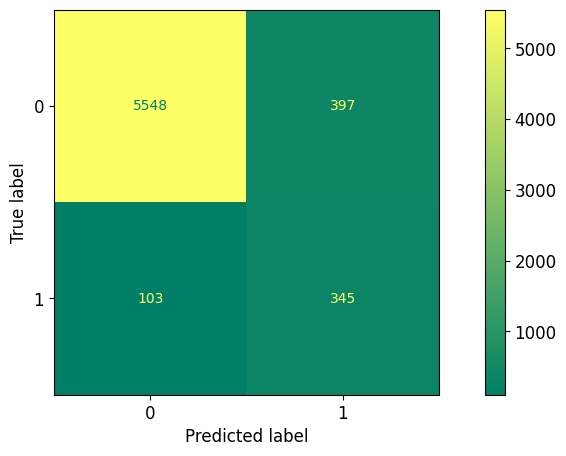

In [76]:
#from sklearn.metrics import plot_confusion_matrix

#plot_confusion_matrix(clf, X_test, y_test, cmap='summer')
#plt.title('Confusion Matrix Test Set')
#plt.show()

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(clf,X_test,y_test, cmap='summer')

### Summary  


* Logistic Regression with default paramaters recall = 29%
* Logistic Regression with class weights in proportion to the data imbalance recall = 75%
* Logistic Regression fine tuned with grid search and balanced class weights recall = 56%
* Logistic Regression fine tuned with grid search and class weights in proportion to data imbalance recall = 77%